## 1. Quick Recap + Transition to Deep Learning 

#### **From Traditional ML to Deep Learning**
In Class 1, we explored classic machine learning models like:

- **Linear Regression** – predicting continuous values
- **Logistic Regression** – binary classification
- **Decision Trees / Random Forest** – rule-based models
- **SVM** – maximizing class boundaries with kernels

These models work well **when we can hand-craft good features** from the data. But what if we don’t know the best features to extract—especially in raw data like **images**, **audio**, or **text**?

---

#### **Why Deep Learning?**
- **Traditional models** rely heavily on **manual feature engineering**
- **Deep learning** lets the model learn these features **automatically** from raw data
- It’s especially powerful for **unstructured data**:
  - Images → CNNs
  - Sequences → RNNs / LSTMs
  - Text → Transformers



#### **Neural Networks: The Core Idea**
A neural network is a system of **interconnected nodes ("neurons")**, organized into **layers**:

- **Input Layer** – receives the data
- **Hidden Layers** – process the data using **weights** and **activations**
- **Output Layer** – makes the final prediction

Each connection has a **weight**, and each neuron applies an **activation function** to decide how much signal to pass on.

---

####  **Activation Functions**
- **Sigmoid**:  
  Maps input values to the range (0, 1), useful for binary classification.  

  $$
  \sigma(x) = \frac{1}{1 + e^{-x}}
  $$

- **ReLU (Rectified Linear Unit)**:  
  Efficient and simple, passes positive values and zeroes out the rest.  

  $$
  \text{ReLU}(x) = \max(0, x)
  $$

#### **Multilayer Perceptron (MLP): The Bridge**
A **Multilayer Perceptron** is a basic fully-connected neural network:
- Every neuron in one layer connects to every neuron in the next
- Layers are **dense** and use **nonlinear activations**
- Great for structured data—but **not ideal for images or sequences**

We'll use MLPs as a conceptual foundation to help understand CNNs and RNNs next.

---

> **Key Takeaway**: Deep learning models automatically extract features through layers of neurons, learning representations from data instead of requiring us to design them manually.



## 2. Convolutional Neural Networks (CNNs) 

#### **What Are CNNs?**
Convolutional Neural Networks (CNNs) are a specialized type of neural network designed to process data with a **grid-like structure**, such as images.

Unlike fully connected networks (MLPs), CNNs:
- Use **local connections** between layers
- Share **weights** across space (filters)
- Automatically learn **spatial hierarchies of features**

They are **the go-to model** for image classification, object detection, and even medical imaging.

---

#### **Core Components of CNNs**

| Component | Description |
|-----------|-------------|
| **Convolution Layer** | Applies filters (or kernels) to detect patterns like edges, textures, etc. |
| **Filter (Kernel)** | A small matrix (e.g., 3×3 or 5×5) that slides across the image |
| **Stride** | How far the filter moves each time (default = 1) |
| **Padding** | Adds extra pixels around the input to preserve spatial dimensions |
| **Pooling Layer** | Reduces the spatial size (e.g., max pooling) to make the model faster and more robust |

---

#### **CNN Architecture Overview**

A typical CNN looks like this:

```
[Input Image]
     ↓
[Convolution + ReLU]
     ↓
[Pooling]
     ↓
[Convolution + ReLU]
     ↓
[Pooling]
     ↓
[Flatten]
     ↓
[Dense (Fully Connected Layer)]
     ↓
[Output Layer (Softmax or Sigmoid)]
```

Each **convolutional block** extracts higher-level features as we go deeper in the network.

---

#### **Why CNNs Work Well on Images**
- **Local connectivity**: Filters only look at small regions, just like our visual system.
- **Translation invariance**: They can detect patterns regardless of where they appear in the image.
- **Fewer parameters**: Compared to MLPs, CNNs are much more efficient with large inputs.

---

#### **Demo Preview: Image Classification**
We'll now build and train a simple CNN using either:
- **MNIST**: handwritten digit recognition (grayscale, 28×28)
- or
- **CIFAR-10**: 10 object classes (color images, 32×32×3)

We’ll walk through each layer and show how the model learns to extract increasingly abstract features from raw pixel data.

---

> **Key takeaway**: CNNs are designed to learn spatial features from image data using convolutional filters, enabling powerful visual pattern recognition.




### CNN Code Demo: MNIST Digit Classification

In this section, we will:
1. Load and preprocess the **MNIST** dataset.
2. Build our **own custom CNN** using Keras.
3. Train and evaluate the model.
4. Introduce typical CNN variants (like **LeNet**, **VGG-style**).
5. Visualize predictions and accuracy.


#### Step 1: Load and Prepare the Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1]
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Reshape for CNN: (samples, height, width, channels)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
Training set shape: (60000, 28, 28, 1)
Test set shape: (10000, 28, 28, 1)


#### Step 2: Build a Simple Custom CNN (Conv → Pool → Conv → Pool → Dense)

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # 32 filters, 3x3 kernel
    MaxPooling2D((2, 2)),                                            # downsample
    
    Conv2D(64, (3, 3), activation='relu'),                           # 64 filters
    MaxPooling2D((2, 2)),                                            # downsample again

    Flatten(),                                                       # flatten to 1D
    Dense(64, activation='relu'),                                    # dense hidden layer
    Dense(10, activation='softmax')                                  # output layer (10 classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

####  Step 3: Compile and Train the Model

In [3]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train_cat, 
                    epochs=5, batch_size=64, 
                    validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 13s 14ms/step - loss: 0.1889 - accuracy: 0.9431 - val_loss: 0.0565 - val_accuracy: 0.9842
Epoch 2/5
844/844 [==============================] - 12s 14ms/step - loss: 0.0573 - accuracy: 0.9819 - val_loss: 0.0515 - val_accuracy: 0.9858
Epoch 3/5
844/844 [==============================] - 12s 14ms/step - loss: 0.0392 - accuracy: 0.9880 - val_loss: 0.0380 - val_accuracy: 0.9888
Epoch 4/5
844/844 [==============================] - 12s 14ms/step - loss: 0.0308 - accuracy: 0.9902 - val_loss: 0.0353 - val_accuracy: 0.9875
Epoch 5/5
844/844 [==============================] - 12s 14ms/step - loss: 0.0233 - accuracy: 0.9925 - val_loss: 0.0326 - val_accuracy: 0.9897


#### Step 4: Evaluate and Visualize Accuracy

313/313 [==============================] - 1s 3ms/step - loss: 0.0352 - accuracy: 0.9883
Test accuracy: 0.99


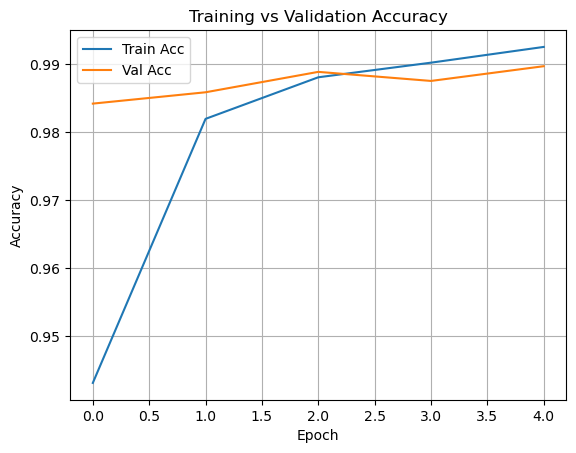

In [4]:
# Evaluate test performance
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(f"Test accuracy: {test_acc:.2f}")

# Plot training vs validation accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#### 🔍 Step 5: Predict and Visualize Some Test Samples

313/313 [==============================] - 1s 3ms/step


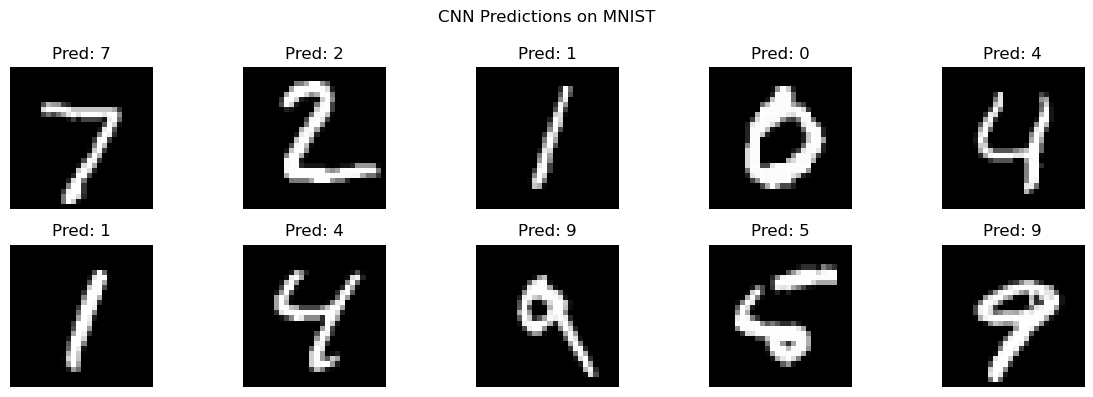

In [5]:
# Predict on test data
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Show 10 test images with predictions
plt.figure(figsize=(12, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}")
    plt.axis('off')
plt.suptitle("CNN Predictions on MNIST")
plt.tight_layout()
plt.show()

#### LeNet (Classic CNN from 1998)

In [6]:
lenet = Sequential([
    Conv2D(6, (5, 5), activation='tanh', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(16, (5, 5), activation='tanh'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(120, activation='tanh'),
    Dense(84, activation='tanh'),
    Dense(10, activation='softmax')
])

#### VGG-style CNN (Simplified)

In [7]:
vgg_style = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

### Exercise

In [ ]:
# modify the traning parameters and try to see how results change
history = model.fit(X_train, y_train_cat, 
                    epochs=5, batch_size=64, 
                    validation_split=0.1)

---

## 3. Recurrent Neural Networks (RNNs)
**Focus**: Sequence modeling (time, text, speech) using memory.

---

#### **What Makes Sequence Data Different?**

Unlike images, **sequence data** has **temporal structure**:

- A word follows another in a sentence
- A note follows another in music
- A sensor records values over time

Each data point is **not independent** — the order matters!

Traditional neural networks (like CNNs or MLPs) don’t remember previous inputs. That’s where RNNs come in.

---

#### **What is an RNN?**

A **Recurrent Neural Network (RNN)** is a type of neural network designed to handle **sequential data** by passing information from one step to the next.

At each time step:

```
output_t = f(input_t, hidden_t-1)
```

- It **takes the current input**,  
- And **combines it with memory from the previous step** (`hidden_t-1`)  
- Then produces an output and updates the hidden state

This gives RNNs a kind of **short-term memory** — they can "remember" what happened before.

---

#### RNN Architecture

```
input_1 → ⟶ 
input_2 → ⟶ 
input_3 → ⟶   [hidden state passes through time]
...     → ⟶ 
```

Each step shares the same weights, allowing the network to **generalize across time steps**.

---

####  RNN Limitations

While RNNs are powerful, they have limitations:

- **Vanishing gradients**: Hard to train on long sequences
- **Short-term memory**: Hard to remember things from far in the past
- **Slow training**: Since data must be processed one step at a time

> These challenges led to improved architectures — like **LSTM** — which we’ll cover next.

---

#### Use Cases for RNNs

- Language modeling (predict next word)
- Time series prediction (e.g., stock prices)
- Music generation
- Anomaly detection in sequential data

---

> **Key takeaway**: RNNs introduce memory into neural networks, allowing them to process and learn from sequential data — like text and time series — by passing information through time.



### RNN Code Demo: Character-Level Sequence Prediction

In this demo, we will:

1. Create a small character sequence dataset (synthetic).
2. Tokenize the characters into numbers.
3. Build a simple RNN model with Keras.
4. Train the model to predict the **next character**.
5. Test and visualize the predictions.


#### Step 1: Generate Sample Data

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Example: character sequence from a short sentence
text = "hello world hello world"

# Create vocabulary
chars = sorted(list(set(text)))
char_to_idx = {ch: i for i, ch in enumerate(chars)}
idx_to_char = {i: ch for ch, i in char_to_idx.items()}
vocab_size = len(chars)
print("Vocabulary:", char_to_idx)

# Encode the sequence into numbers
encoded = np.array([char_to_idx[c] for c in text])

# Prepare input-output pairs: X = previous chars, y = next char
sequence_length = 5
X = []
y = []
for i in range(len(encoded) - sequence_length):
    X.append(encoded[i:i+sequence_length])
    y.append(encoded[i+sequence_length])
X = np.array(X)
y = to_categorical(y, num_classes=vocab_size)

print("X shape:", X.shape)
print("y shape:", y.shape)

Vocabulary: {' ': 0, 'd': 1, 'e': 2, 'h': 3, 'l': 4, 'o': 5, 'r': 6, 'w': 7}
X shape: (18, 5)
y shape: (18, 8)


#### Step 2: Build a Simple RNN Model

In [9]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=8, input_length=sequence_length),
    SimpleRNN(units=32, return_sequences=False),
    Dense(vocab_size, activation='softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5, 8)              64        
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1312      
                                                                 
 dense_7 (Dense)             (None, 8)                 264       
                                                                 
Total params: 1640 (6.41 KB)
Trainable params: 1640 (6.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


####  Step 3: Compile and Train the Model

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X, y, epochs=100, verbose=0)
print("Final training accuracy:", history.history['accuracy'][-1])

Final training accuracy: 1.0


#### Step 4: Plot Training Accuracy

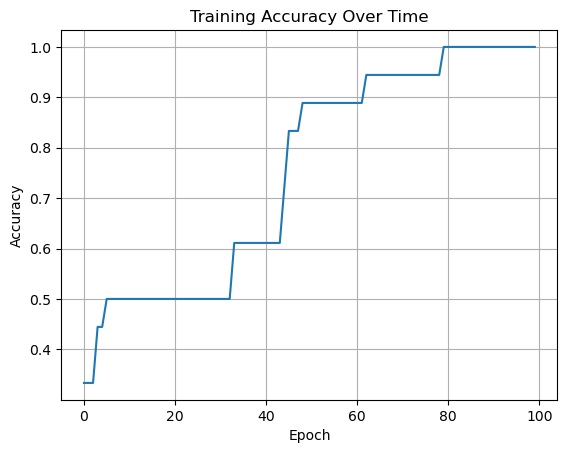

In [11]:
plt.plot(history.history['accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training Accuracy Over Time")
plt.grid(True)
plt.show()

#### Step 5: Predict the Next Character

In [12]:
# Pick a seed sequence
seed = "hello"
seed_encoded = np.array([char_to_idx[ch] for ch in seed]).reshape(1, -1)

# Predict next character
pred = model.predict(seed_encoded)
pred_char = idx_to_char[np.argmax(pred)]

print(f"Given input '{seed}' → predicted next char: '{pred_char}'")

1/1 [==============================] - 0s 94ms/step
Given input 'hello' → predicted next char: ' '


### Exercise

In [ ]:
# modify the seed then see how the prediction change
seed = "ello "
seed_encoded = np.array([char_to_idx[ch] for ch in seed]).reshape(1, -1)

# Predict next character
pred = model.predict(seed_encoded)
pred_char = idx_to_char[np.argmax(pred)]

print(f"Given input '{seed}' → predicted next char: '{pred_char}'")

---

## 4. Long Short-Term Memory (LSTM)
**Focus**: Overcoming RNN limitations by remembering long-term dependencies.

---

#### Why LSTM?

While RNNs are great at processing sequences, they struggle with **long-term memory**.

This is due to the **vanishing gradient problem**: as backpropagation passes through many time steps, gradients shrink, and the model stops learning from earlier inputs.

**LSTM** was invented to fix that.

---

#### What is LSTM?

LSTM stands for **Long Short-Term Memory**. It's a special kind of RNN cell with a **memory cell** inside and **gates** to control the flow of information.

Instead of just passing a hidden state, LSTM keeps **two internal states**:
- **Hidden state (`h_t`)** — like in a normal RNN
- **Cell state (`c_t`)** — the long-term memory

At each time step, the LSTM uses **gates** to decide:
- What to **forget** from the past
- What to **remember** from the current input
- What to **output** for the next step

---

#### LSTM Gates

An LSTM cell has three main gates:

| Gate Type      | Function                                           |
|----------------|----------------------------------------------------|
| Forget Gate    | Decides what to discard from the previous memory   |
| Input Gate     | Decides what new information to store              |
| Output Gate    | Decides what to send to the next step              |

> These gates are trained with learnable weights, just like regular neural network layers.

---

#### LSTM Architecture (Conceptual)

```
         ┌──────────────┐
Previous │  Cell State  │────┐
State    └──────────────┘    ▼
                   ┌────────────┐
Input ───────────► │   LSTM     │ ─────────► Output
                   │   Cell     │
Hidden ───────────►│ (gated)    │ ─────────► New Hidden State
                   └────────────┘
```

- **Memory (cell state)** flows straight through with minimal modification
- **Gates** are used to update memory when necessary
- This allows the model to **retain long-term patterns** without forgetting

---

#### Use Cases for LSTM

LSTMs are great for:
- **Language modeling** and text generation
- **Machine translation**
- **Speech recognition**
- **Time series forecasting**
- **Medical data (e.g., ECG, EEG signals)**

They outperform basic RNNs in tasks where remembering **long-term patterns** is critical.

---

####  RNN vs. LSTM Summary

| Feature          | RNN                          | LSTM                                 |
|------------------|------------------------------|---------------------------------------|
| Memory           | Short-term only              | Short-term + long-term (cell state)   |
| Gradient issues  | Vanishing gradients          | Solved with gated memory              |
| Best for         | Simple/short sequences       | Complex/longer dependencies           |

---

> **Key takeaway**: LSTM cells can remember information over long sequences by using gates to manage memory — making them ideal for more complex, temporal tasks.


#### Step 1: Reuse the Same Dataset

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Character sequence
text = "hello world hello world"

# Build vocabulary
chars = sorted(list(set(text)))
char_to_idx = {ch: i for i, ch in enumerate(chars)}
idx_to_char = {i: ch for ch, i in char_to_idx.items()}
vocab_size = len(chars)

# Encode text
encoded = np.array([char_to_idx[c] for c in text])

# Prepare input/output pairs
seq_length = 5
X = []
y = []
for i in range(len(encoded) - seq_length):
    X.append(encoded[i:i+seq_length])
    y.append(encoded[i+seq_length])
X = np.array(X)
y = to_categorical(y, num_classes=vocab_size)

print("Vocabulary:", char_to_idx)
print("X shape:", X.shape)
print("y shape:", y.shape)

Vocabulary: {' ': 0, 'd': 1, 'e': 2, 'h': 3, 'l': 4, 'o': 5, 'r': 6, 'w': 7}
X shape: (18, 5)
y shape: (18, 8)


#### Step 2: Build an LSTM Model

In [14]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=8, input_length=seq_length),
    LSTM(units=64),
    Dense(vocab_size, activation='softmax')
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 5, 8)              64        
                                                                 
 lstm (LSTM)                 (None, 64)                18688     
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
Total params: 19272 (75.28 KB)
Trainable params: 19272 (75.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Step 3: Compile and Train the Model

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X, y, epochs=100, verbose=0)
print("Final training accuracy:", history.history['accuracy'][-1])

Final training accuracy: 0.8333333134651184


#### Step 4: Visualize Training Accuracy

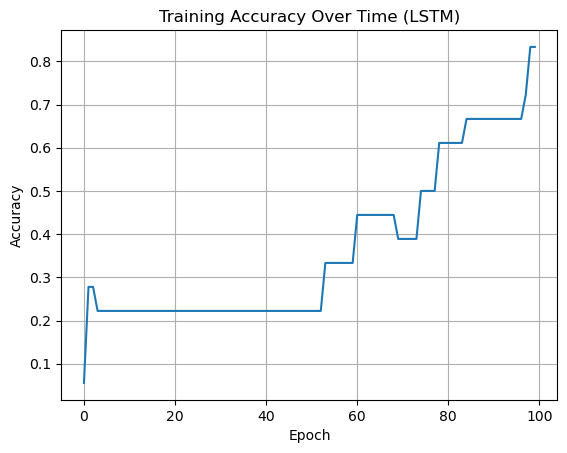

In [16]:
plt.plot(history.history['accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training Accuracy Over Time (LSTM)")
plt.grid(True)
plt.show()

#### Step 5: Predict the Next Character

In [17]:
# Try predicting the next char after 'hello'
seed = "hello"
seed_encoded = np.array([char_to_idx[ch] for ch in seed]).reshape(1, -1)

# Predict
pred = model.predict(seed_encoded)
pred_char = idx_to_char[np.argmax(pred)]

print(f"Given input '{seed}' → predicted next char: '{pred_char}'")

1/1 [==============================] - 0s 263ms/step
Given input 'hello' → predicted next char: ' '


### Exercise

In [ ]:
# Try predicting the next char after 'world'
seed = "world"
seed_encoded = np.array([char_to_idx[ch] for ch in seed]).reshape(1, -1)

# Predict
pred = model.predict(seed_encoded)
pred_char = idx_to_char[np.argmax(pred)]

print(f"Given input '{seed}' → predicted next char: '{pred_char}'")

---

## 5. Generative Adversarial Networks (GANs)
**Focus**: Learn how GANs create realistic images from random noise.

---

#### What is a GAN?

A **Generative Adversarial Network (GAN)** is a deep learning model used for **generating new data** — often images — that looks just like the real thing.

It was introduced by Ian Goodfellow in 2014 and has become a major tool in:
- AI art
- Deepfake generation
- Data augmentation
- Medical image synthesis
- Super-resolution and image enhancement

---

#### GAN = Generator + Discriminator

A GAN is made up of **two neural networks** that play a game with each other:

| Component     | Role                                                             |
|---------------|------------------------------------------------------------------|
| **Generator** | Creates fake images from random noise (tries to fool the other) |
| **Discriminator** | Tries to tell real images apart from fake ones              |

This creates a **minimax game**:
- The Generator improves by learning how to fool the Discriminator.
- The Discriminator improves by getting better at spotting fakes.

Over time, the Generator gets so good that even the Discriminator can’t tell the difference.

---

#### Training Loop Summary

1. **Sample random noise** (like a vector of 100 random numbers)
2. Generator turns that into a fake image
3. Discriminator sees:
   - A real image (from the dataset)
   - A fake image (from the Generator)
4. Discriminator learns to classify real vs. fake
5. Generator updates its weights to **fool** the Discriminator
6. Repeat for many iterations

---

#### What Can GANs Do?

| Task                            | Example Use                                |
|----------------------------------|---------------------------------------------|
| Image Generation                | Create new faces, animals, or buildings     |
| Data Augmentation               | Synthesize more training data               |
| Style Transfer                  | Convert sketches into photos                |
| Inpainting                      | Fill in missing parts of images             |
| Domain Transfer                 | Convert day-to-night, summer-to-winter      |

---

#### Goal of the GAN

The ultimate goal is to make **synthetic data that looks real**.

The Generator and Discriminator are like:
- **A counterfeiter** trying to create perfect fake currency
- **A detective** trying to detect fakes

By playing this game, both get better. And the result? A model that can generate extremely realistic outputs from scratch.

---

#### Fun Fact

GANs are also used in research and health care — for example:
- Generating **synthetic medical scans**
- Balancing **imbalanced datasets**
- Creating **training samples** when real data is limited

---

> **Key takeaway**: GANs are a powerful framework for generating new data by training two networks against each other — one to create, one to detect.



### Step 1: Load and Prepare MNIST Data

In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, LeakyReLU, Reshape, Flatten, Input
from tensorflow.keras.models import Sequential, Model
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
(X_train, _), (_, _) = mnist.load_data()
X_train = X_train.astype('float32') / 255.0  # Normalize to [0, 1]
X_train = X_train.reshape(-1, 28 * 28)        # Flatten to vectors
print("Training data shape:", X_train.shape)


Training data shape: (60000, 784)


### Step 2: Build the Generator

In [19]:
def build_generator():
    model = Sequential([
        Dense(128, input_dim=100),
        LeakyReLU(0.2),
        Dense(784, activation='sigmoid'),
        Reshape((28, 28))
    ])
    return model

generator = build_generator()
generator.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               12928     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 784)               101136    
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
Total params: 114064 (445.56 KB)
Trainable params: 114064 (445.56 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Step 3: Build the Discriminator

In [20]:
def build_discriminator():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128),
        LeakyReLU(0.2),
        Dense(1, activation='sigmoid')
    ])
    return model

discriminator = build_discriminator()
discriminator.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               100480    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 1)                 129       
                                                                 
Total params: 100609 (393.00 KB)
Trainable params: 100609 (393.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Step 4: Build and Train the GAN

In [24]:
# 1. Build models
generator = build_generator()
discriminator = build_discriminator()

# 2. Run a dummy input to initialize discriminator
_ = discriminator(np.zeros((1, 28, 28)))

# 3. Compile discriminator
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 4. Freeze discriminator
discriminator.trainable = False

# 5. Connect GAN
z = Input(shape=(100,))
img = generator(z)
validity = discriminator(img)
gan = Model(z, validity)

# 6. Compile GAN
gan.compile(optimizer='adam', loss='binary_crossentropy')


### Step 5: Train the GAN (Small Run)

Epoch 0: D Loss = 0.565, G Loss = 3.555


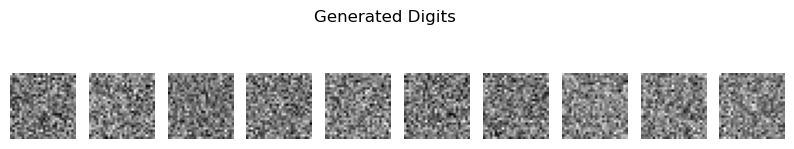

Epoch 200: D Loss = 0.720, G Loss = 0.992


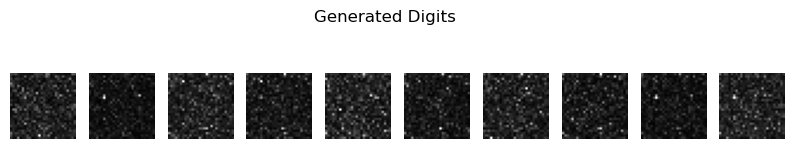

Epoch 400: D Loss = 0.820, G Loss = 0.762


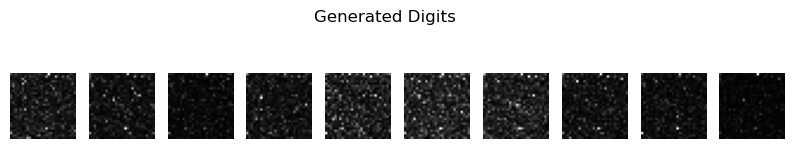

Epoch 600: D Loss = 0.835, G Loss = 0.717


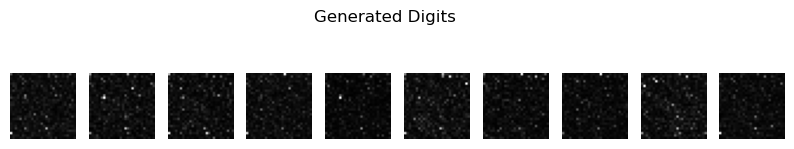

Epoch 800: D Loss = 0.841, G Loss = 0.709


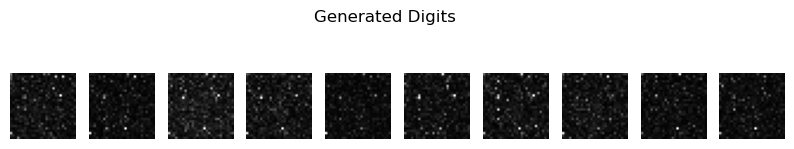

In [25]:
def train_gan(epochs=1000, batch_size=64):
    half_batch = batch_size // 2

    for epoch in range(epochs):
        # Train Discriminator
        idx = np.random.randint(0, X_train.shape[0], half_batch)
        real_imgs = X_train[idx]

        noise = np.random.normal(0, 1, (half_batch, 100))
        fake_imgs = generator.predict(noise, verbose=0)

        d_loss_real = discriminator.train_on_batch(real_imgs, np.ones((half_batch, 1)))
        d_loss_fake = discriminator.train_on_batch(fake_imgs, np.zeros((half_batch, 1)))

        # Train Generator
        noise = np.random.normal(0, 1, (batch_size, 100))
        g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

        if epoch % 200 == 0:
            print(f"Epoch {epoch}: D Loss = {np.mean(d_loss_real):.3f}, G Loss = {g_loss:.3f}")
            show_generated_images(generator)

def show_generated_images(generator, n=10):
    noise = np.random.normal(0, 1, (n, 100))
    gen_imgs = generator.predict(noise, verbose=0)

    plt.figure(figsize=(10, 2))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(gen_imgs[i], cmap='gray')
        plt.axis('off')
    plt.suptitle("Generated Digits")
    plt.show()

X_train = X_train.astype('float32') / 255.0  # Normalize to [0, 1]
X_train = X_train.reshape(-1, 28, 28)         # Keep shape as (28, 28)

train_gan(epochs=1000)


### Exercise

In [ ]:
# try with more epochs
train_gan(epochs=10000)

### DCGAN – Deep Convolutional GAN (Structure Only)

In [ ]:
from tensorflow.keras.layers import Conv2DTranspose, Conv2D, BatchNormalization

def build_dcgan_generator():
    model = Sequential([
        Dense(7*7*128, input_dim=100),
        LeakyReLU(0.2),
        Reshape((7, 7, 128)),
        Conv2DTranspose(64, kernel_size=4, strides=2, padding='same'),
        BatchNormalization(),
        LeakyReLU(0.2),
        Conv2DTranspose(1, kernel_size=4, strides=2, padding='same', activation='tanh')
    ])
    return model

print("DCGAN Generator Summary:")
build_dcgan_generator().summary()

### Conditional GAN (cGAN) – Conditioned on Labels

In [ ]:
from tensorflow.keras.layers import Concatenate, Embedding, Flatten

def build_conditional_generator():
    noise = Input(shape=(100,))
    label = Input(shape=(1,))
    
    label_embedding = Flatten()(Embedding(10, 100)(label))
    combined = Concatenate()([noise, label_embedding])

    x = Dense(128)(combined)
    x = LeakyReLU(0.2)(x)
    x = Dense(784, activation='sigmoid')(x)
    x = Reshape((28, 28))(x)

    return Model([noise, label], x)

print("Conditional GAN Generator Summary:")
build_conditional_generator().summary()




## 5. Transformers


### Why Did Transformers Replace RNNs?

- RNNs process data **step by step**, so they’re **slow** and **hard to parallelize**
- They struggle with **long-term dependencies**
- Transformers were introduced in 2017 by Vaswani et al. in the paper:  
  📝 *"Attention is All You Need"*

Transformers:
- Process sequences **all at once** (no loops!)
- Use **self-attention** to find what matters in context
- Enable **faster training** and **better results**

---

### Key Idea: Self-Attention

Let’s say we have a sentence:

> "The animal didn't cross the road because **it** was too tired."

To understand "it", we need to look back to "animal".

That’s what **self-attention** does:  
> Every word attends to every other word to decide what’s important.

---

### Components of the Transformer

#### 1. **Self-Attention**
- Each word gets a **query**, **key**, and **value** vector
- Attention = similarity between **query** and **key**
- Output = weighted sum of **value** vectors

#### 2. **Multi-Head Attention**
- Instead of one attention function, we compute **multiple heads in parallel**
- This lets the model focus on **different parts** of the sentence

#### 3. **Positional Encoding**
- Transformers don’t use recurrence, so we inject order into the model
- Positional encoding adds sinusoidal signals to input embeddings to encode word positions

#### 4. **Feedforward Layers**
- After attention, data goes through **fully connected layers**

#### 5. **Layer Norm + Residuals**
- Every block uses **skip connections** and **normalization** to stabilize training

---

### Encoder–Decoder Structure

Transformers are often **encoder-decoder** models:

- **Encoder**: Processes input (e.g., a sentence in English)
- **Decoder**: Produces output (e.g., a translation in French)
- The decoder also uses **cross-attention** to focus on encoder output

---

### Real-World Applications

| Model      | Use Case                  |
|------------|---------------------------|
| BERT       | Question answering, NLU   |
| GPT-3/4    | Chat, code generation     |
| T5         | Text-to-text tasks        |
| Whisper    | Speech recognition        |
| ViT        | Vision Transformer (images) |
| ChatGPT    | Conversational agent (like me!) |

---

### Code Demo: Tiny Transformer in Action

We’ll use the `transformers` library to run a pre-trained model on a real task.

- Install:
```bash
pip install transformers
```

- Sentiment analysis demo:


In [1]:
import torch
import transformers
print(torch.__version__)
print(transformers.__version__)

from transformers import pipeline

classifier = pipeline("sentiment-analysis")
result = classifier("This workshop is really fun and informative!")
print(result)


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

2.6.0+cpu
4.38.2


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
E:\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


[{'label': 'POSITIVE', 'score': 0.9998776912689209}]


- Text summarization demo:

In [2]:
summarizer = pipeline("summarization")
text = "Transformers have revolutionized NLP by replacing RNNs with self-attention mechanisms that scale well..."
summary = summarizer(text)
print(summary[0]['summary_text'])


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

E:\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\826yi\.cache\huggingface\hub\models--sshleifer--distilbart-cnn-12-6. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Your max_length is set to 142, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


 Transformers have revolutionized NLP by replacing RNNs with self-attention mechanisms that scale well . Transformers have been shown to be able to scale well with self attention mechanisms . NLP is a form of formative form of language that can be used to help people understand complex problems in complex systems .


#### Bonus: How to Customize Models

In [ ]:
classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

### Summary

- Transformers are **fast, parallel, and accurate**
- They **understand full context** using self-attention
- They power **modern NLP and AI tools** like ChatGPT
- You can access them with **just a few lines of code** using `transformers`
